In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

df = pd.read_csv("C:/Users/user/Downloads/DATA/titanic-trainds.csv")   # adjust path if needed


In [43]:
# Shape of dataset (rows, columns)
print("Shape:", df.shape)

# First few rows
df.head()

# Info on datatypes and nulls
df.info()

# Summary statistics
df.describe(include='all').T  # .T to transpose for readability

# Missing values table
missing = df.isnull().sum().sort_values(ascending=False)
missing_pct = (df.isnull().mean()*100).sort_values(ascending=False)
pd.concat([missing, missing_pct], axis=1, keys=['Missing', 'Pct Missing'])


Shape: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,Missing,Pct Missing
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


In [27]:
df['Sex'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [28]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [29]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

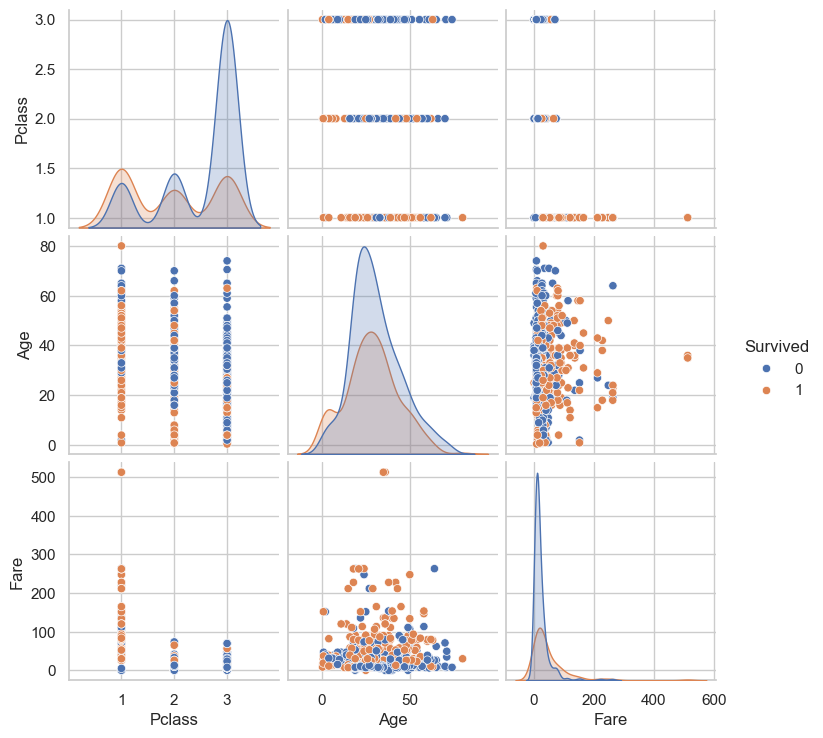

In [33]:
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare']], hue='Survived', diag_kind='kde')
plt.show()
# Passengers in 1st class (Pclass = 1) paid higher fares and had a higher survival rate.

# Higher fares are mostly associated with survival, especially in Pclass 1.

# Younger passengers had a slightly higher survival tendency, especially in higher classes.

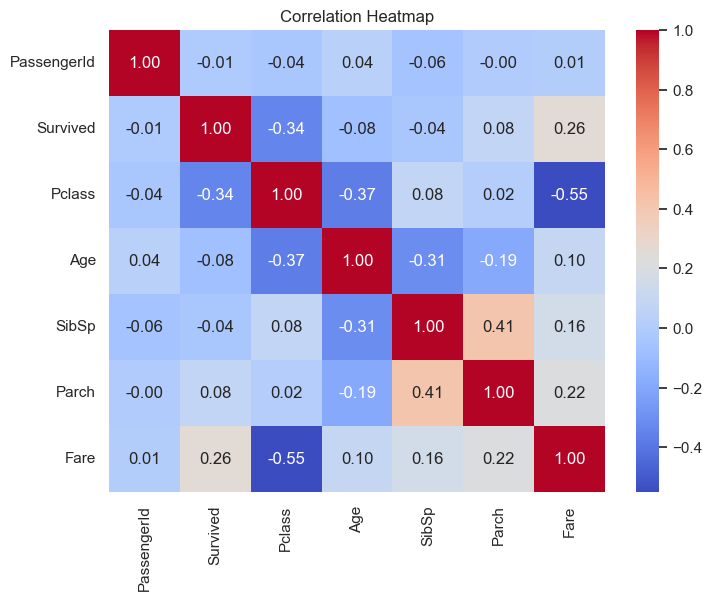

In [37]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
# "Pclass shows the strongest relationship with survival (-0.34), confirming that passenger class played a significant role in survival rates."

# "Fare is moderately positively correlated with survival (0.26), suggesting passengers who paid higher fares had better chances."

# "Age has a very weak correlation (-0.08) with survival, meaning age alone is not a strong predictor."

# "Pclass and Fare are strongly negatively correlated (-0.55), which is expected since higher-class tickets cost more."

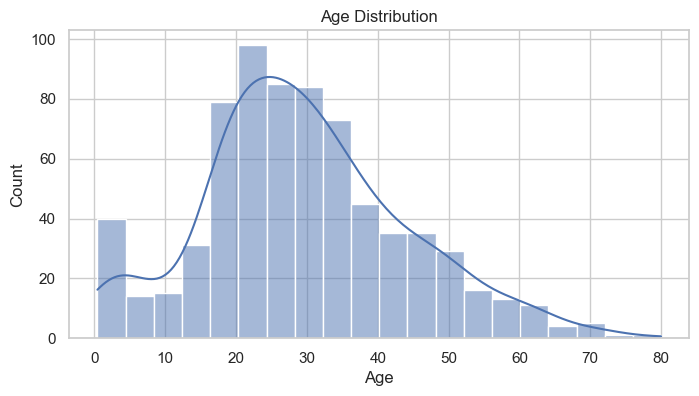

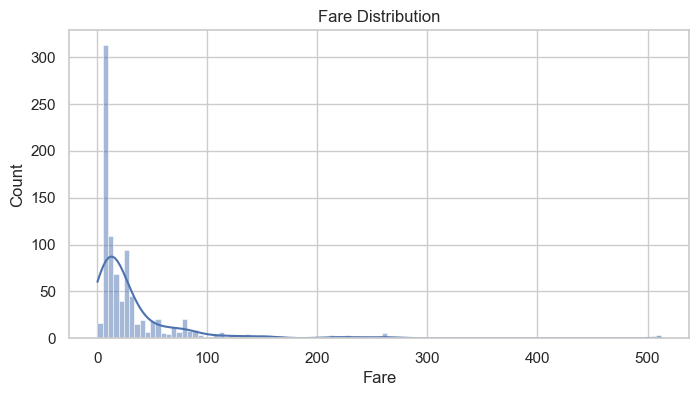

In [38]:
plt.figure(figsize=(8,4))
sns.histplot(df['Age'].dropna(), kde=True)
plt.title("Age Distribution")
plt.show()
#"Most passengers were between 20–40 years old, with a smaller group of children under 10. The distribution is slightly right-skewed, with fewer elderly passengers."

plt.figure(figsize=(8,4))
sns.histplot(df['Fare'].dropna(), kde=True)
plt.title("Fare Distribution")
plt.show()
# Fare distribution is highly right-skewed — most passengers paid less than $50, while a few paid above $200. This suggests a wide range of ticket prices, likely reflecting passenger class differences.

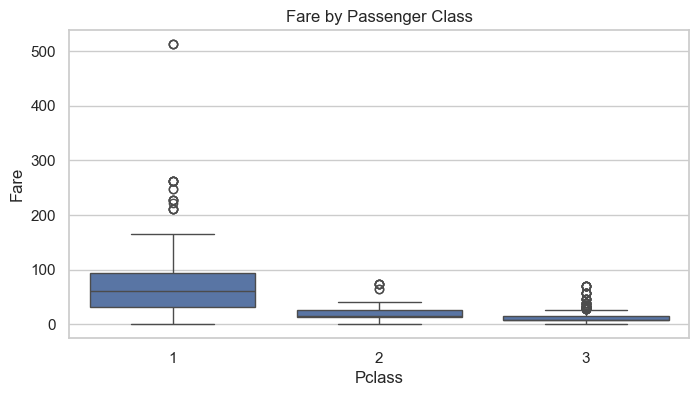

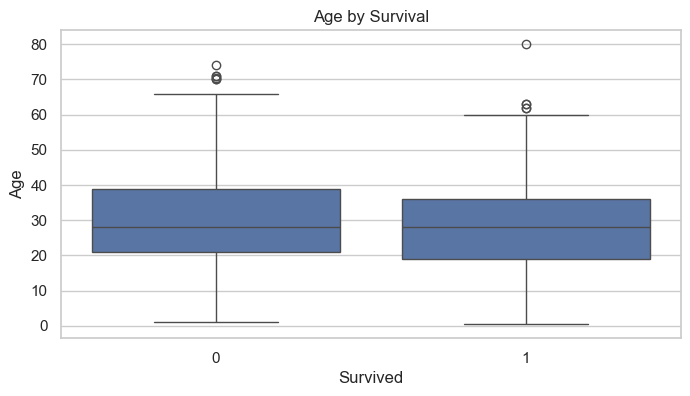

In [39]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title("Fare by Passenger Class")
plt.show()
# Median fare decreases sharply from 1st to 3rd class. First-class fares vary widely, with several extreme high values, while third-class fares are more tightly clustered at the lower end.
plt.figure(figsize=(8,4))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age by Survival")
plt.show()
# Median age is similar for survivors and non-survivors, but survivors have a higher presence of very young passengers, indicating children may have had a slightly better survival chance.

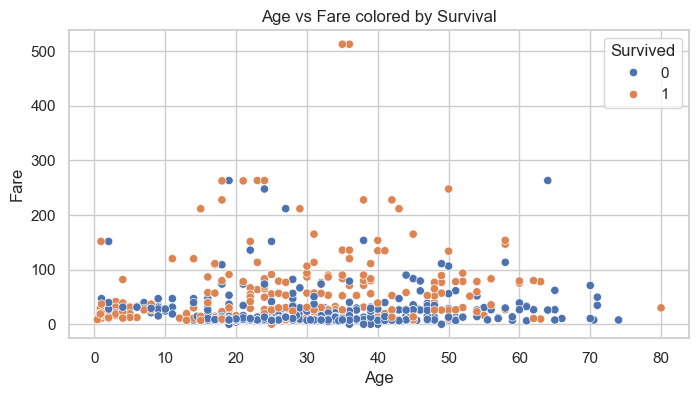

In [42]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title("Age vs Fare colored by Survival")
plt.show()
# Most passengers paid low fares (< $50), with survival rates higher among those who paid higher fares. Survivors are more common among young children, especially in higher fare ranges, indicating that fare and age may both play roles in survival chances.

In [ ]:
#  Summary of findings:

# “Females had a much higher survival rate than males.”

# “Passengers in 1st class had higher survival rates.”

# “Higher fares and younger age are weakly associated with higher survival.”

# “Fare distribution is right-skewed; a few very high values exist.”

# “Age has missing values (~20%); Cabin has high missingness (~77%).”